In [1]:
!pip install plotly
!pip install cufflinks
!pip install matplotlib
!pip install wordcloud
!pip install plotly_express
!pip install sklearn

In [2]:
#Importing Libraries
import numpy as np 
import pandas as pd 

import plotly.graph_objs as go
from plotly.offline import  init_notebook_mode, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import plotly_express as px
%matplotlib inline

from IPython.display import display
from PIL import Image
import io
import requests

import string
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [3]:
# goodreads data

books_data = pd.read_csv('books.csv',error_bad_lines = False)
tags_data = pd.read_csv('book_tags.csv')
ratings_data = pd.read_csv('ratings.csv')
book_tags = pd.read_csv('tags.csv')


In [4]:
books_data.shape

(10000, 23)

In [5]:
books_data.head()


,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [6]:
books_data.shape

(10000, 23)

In [7]:
#drop unnecessary columns
books_data = books_data.drop(columns=['id', 'best_book_id', 'work_id', 'isbn', 'isbn13', 'title','work_ratings_count',
                                   'work_text_reviews_count', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 
                                    'small_image_url'])

In [8]:
books_data.head()

,book_id,books_count,authors,original_publication_year,original_title,language_code,average_rating,ratings_count,image_url
0,2767052,272,Suzanne Collins,2008.0,The Hunger Games,eng,4.34,4780653,https://images.gr-assets.com/books/1447303603m...
1,3,491,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,eng,4.44,4602479,https://images.gr-assets.com/books/1474154022m...
2,41865,226,Stephenie Meyer,2005.0,Twilight,en-US,3.57,3866839,https://images.gr-assets.com/books/1361039443m...
3,2657,487,Harper Lee,1960.0,To Kill a Mockingbird,eng,4.25,3198671,https://images.gr-assets.com/books/1361975680m...
4,4671,1356,F. Scott Fitzgerald,1925.0,The Great Gatsby,eng,3.89,2683664,https://images.gr-assets.com/books/1490528560m...


In [9]:
#drop rows with NA values
books_data = books_data.dropna()
books_data.head()

,book_id,books_count,authors,original_publication_year,original_title,language_code,average_rating,ratings_count,image_url
0,2767052,272,Suzanne Collins,2008.0,The Hunger Games,eng,4.34,4780653,https://images.gr-assets.com/books/1447303603m...
1,3,491,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,eng,4.44,4602479,https://images.gr-assets.com/books/1474154022m...
2,41865,226,Stephenie Meyer,2005.0,Twilight,en-US,3.57,3866839,https://images.gr-assets.com/books/1361039443m...
3,2657,487,Harper Lee,1960.0,To Kill a Mockingbird,eng,4.25,3198671,https://images.gr-assets.com/books/1361975680m...
4,4671,1356,F. Scott Fitzgerald,1925.0,The Great Gatsby,eng,3.89,2683664,https://images.gr-assets.com/books/1490528560m...


In [10]:
#drop duplicates from all datasets
ratings_data = ratings_data.sort_values("user_id")
ratings_data.drop_duplicates(subset =["user_id","book_id"], keep = False, inplace = True) 
books_data.drop_duplicates(subset='original_title',keep=False,inplace=True)
book_tags.drop_duplicates(subset='tag_id',keep=False,inplace=True)
tags_data.drop_duplicates(subset=['tag_id','goodreads_book_id'],keep=False,inplace=True)


In [11]:
#high rated books
top_rated = books_data.sort_values('average_rating', ascending=False)
tf_top_rated = top_rated[:25]
fig = px.bar(tf_top_rated, x="average_rating", y="original_title", title='Top Rated Books and Their Ratings',
             orientation='h', color='original_title', width=1500, height=700)
fig.show()


In [12]:
#popular books
top_popular = books_data.sort_values('ratings_count', ascending=False)
fifty_top_popular = top_popular[:50]
fig = px.bar(fifty_top_popular, x="ratings_count", y="original_title", title='Top Popular Books', orientation='h', color='original_title',
             width=1500, height=700)
fig.show()


In [13]:
#top authors stacked bar chart
top_author_counts = books_data['authors'].value_counts().reset_index()
top_author_counts.columns = ['value', 'count']
top_author_counts['value'] = top_author_counts['value']
top_author_counts = top_author_counts.sort_values('count')
fig = px.bar(top_author_counts.tail(50), x="count", y="value", title='Top Authors', orientation='h', color='value',
             width=1000, height=700)
fig.show()


In [14]:
stop_words=set(STOPWORDS)
author_string = " ".join(books_data['authors'])
title_string = " ".join(books_data['original_title'])

In [15]:
def wordcloud(string):
    wc = WordCloud(width=800,height=500,mask=None,random_state=21, max_font_size=110,stopwords=stop_words).generate(string)
    fig=plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(wc)

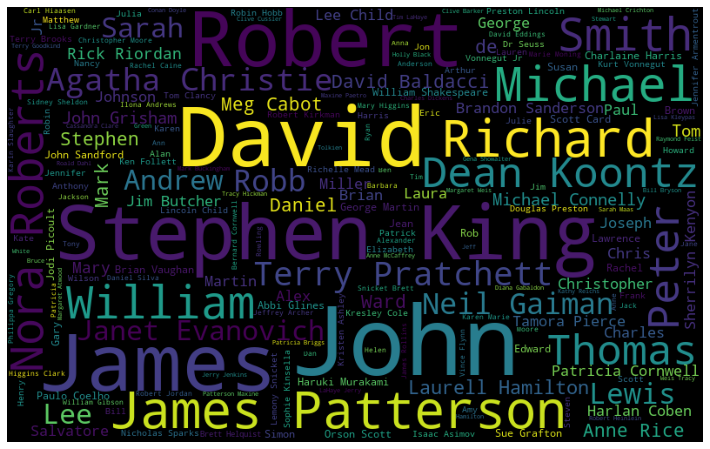

In [16]:
wordcloud(author_string)

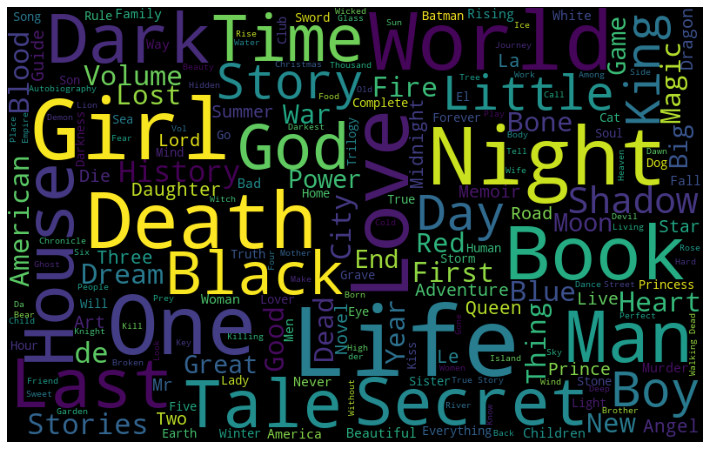

In [17]:
wordcloud(title_string)

In [18]:
content_data = books_data[['original_title','authors','average_rating']]
content_data = content_data.astype(str)

In [19]:
content_data['content'] = content_data['original_title'] + ' ' + content_data['authors'] + ' ' + content_data['average_rating']

In [20]:
#producing dataframe 'X'
content_data.head()

,original_title,authors,average_rating,content
0,The Hunger Games,Suzanne Collins,4.34,The Hunger Games Suzanne Collins 4.34
1,Harry Potter and the Philosopher's Stone,"J.K. Rowling, Mary GrandPré",4.44,Harry Potter and the Philosopher's Stone J.K. ...
3,To Kill a Mockingbird,Harper Lee,4.25,To Kill a Mockingbird Harper Lee 4.25
4,The Great Gatsby,F. Scott Fitzgerald,3.89,The Great Gatsby F. Scott Fitzgerald 3.89
5,The Fault in Our Stars,John Green,4.26,The Fault in Our Stars John Green 4.26


In [21]:
content_data = content_data.reset_index()
indices = pd.Series(content_data.index, index=content_data['original_title'])
content_data.head()

,index,original_title,authors,average_rating,content
0,0,The Hunger Games,Suzanne Collins,4.34,The Hunger Games Suzanne Collins 4.34
1,1,Harry Potter and the Philosopher's Stone,"J.K. Rowling, Mary GrandPré",4.44,Harry Potter and the Philosopher's Stone J.K. ...
2,3,To Kill a Mockingbird,Harper Lee,4.25,To Kill a Mockingbird Harper Lee 4.25
3,4,The Great Gatsby,F. Scott Fitzgerald,3.89,The Great Gatsby F. Scott Fitzgerald 3.89
4,5,The Fault in Our Stars,John Green,4.26,The Fault in Our Stars John Green 4.26


In [22]:
indices.head()

original_title
The Hunger Games                            0
Harry Potter and the Philosopher's Stone    1
To Kill a Mockingbird                       2
The Great Gatsby                            3
The Fault in Our Stars                      4
dtype: int64

In [23]:
#content based recommodation author:

#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

print(tfidf)

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(content_data['authors'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)


(8175, 5484)

In [24]:
print(tfidf_matrix)

  (0, 965)	0.7135413760651069
  (0, 4742)	0.7006130919723907
  (1, 1900)	0.6582918727893116
  (1, 3233)	0.4891232936005631
  (1, 4252)	0.5721977052355925
  (2, 2882)	0.59471074099159
  (2, 2050)	0.8039397580349127
  (3, 1615)	0.8166644978229046
  (3, 4396)	0.5771127255533905
  (4, 1913)	0.8326888529075157
  (4, 2447)	0.553741161774674
  (5, 4896)	1.0
  (6, 4317)	1.0
  (7, 653)	0.7038081502596678
  (7, 1105)	0.7103900953898957
  (8, 279)	0.7693953310064916
  (8, 2361)	0.6387729053626267
  (9, 2240)	0.7148222538188659
  (9, 2644)	0.6993061886222062
  (10, 4241)	0.6931935528483132
  (10, 5028)	0.7207514816422738
  (11, 5359)	0.45671021874009043
  (11, 816)	0.45671021874009043
  (11, 1706)	0.43683217960920123
  (11, 1487)	0.4028504472650202
  :	:
  (8163, 2447)	0.4404916732794126
  (8164, 3006)	0.7628799694130833
  (8164, 4016)	0.6465401397193318
  (8165, 2161)	0.7705268913890998
  (8165, 3760)	0.6374074910496821
  (8166, 3733)	0.7989132848142405
  (8166, 428)	0.6014462264802402
  (8167, 3

In [25]:
#Inputting the tfidf matrix into a linear kernal function
cosine_sim_author = linear_kernel(tfidf_matrix, tfidf_matrix)

In [26]:
#author wise recommodation
def get_recommendations_books(title, cosine_sim=cosine_sim_author):
    idx = indices[title]

    # Get the pairwsie similarity scores of all books with that book
    sim_scores = list(enumerate(cosine_sim_author[idx]))

    # Sort the books based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar books
    sim_scores = sim_scores[1:11]

    # Get the book indices
    book_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar books
    return list(content_data['original_title'].iloc[book_indices])


In [27]:
def author_book_shows(book):
    for book in book:
        print(book)
        for idx in books_data.index:
            if books_data['original_title'][idx]==book:
                path= books_data['image_url'][idx]
                r = requests.get(path)
                pil_im = Image.open(io.BytesIO(r.content))
                im_array = np.asarray(pil_im)
                plt.imshow(im_array)
                plt.show()

Enter field: Harry Potter and the Goblet of Fire
Harry Potter and the Goblet of Fire
Harry Potter and the Order of the Phoenix


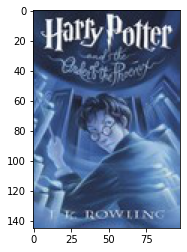

Harry Potter and the Chamber of Secrets


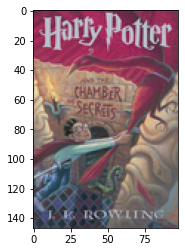

Harry Potter and the Goblet of Fire


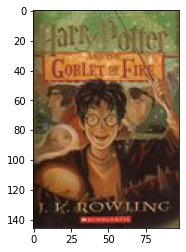

Harry Potter and the Deathly Hallows


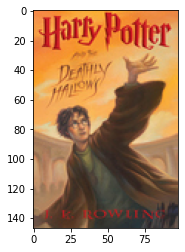

Harry Potter and the Half-Blood Prince


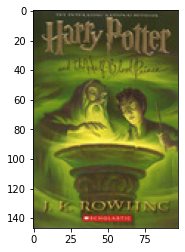

Harry Potter Boxed Set Books 1-4


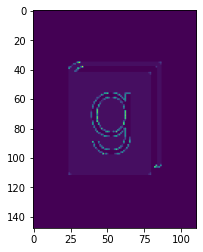

Harry Potter and the Prisoner of Azkaban


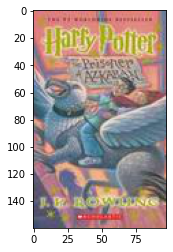

The Casual Vacancy


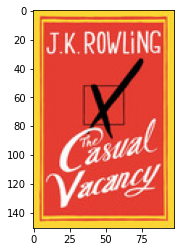

The Tales of Beedle the Bard


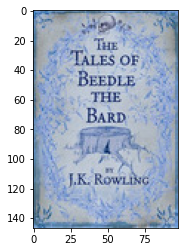

Complete Harry Potter Boxed Set


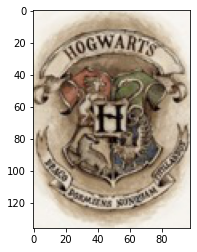

In [29]:
#Sample inputs: The Hobbit , Shadow Kiss , Harry Potter and the Goblet of Fire , The Two Towers
name=input("Enter field: ")
print(name)
books = get_recommendations_books(name, cosine_sim_author)
author_book_shows(books)

In [30]:
#content based filtering on multiple matrix

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(content_data['content'])

cosine_sim_content = cosine_similarity(count_matrix, count_matrix)
print(count_matrix)

  (0, 95)	1
  (0, 2273)	1
  (0, 4298)	1
  (0, 5316)	1
  (0, 10904)	1
  (1, 105)	1
  (1, 4603)	1
  (1, 4891)	1
  (1, 7106)	1
  (1, 8624)	1
  (1, 8843)	1
  (1, 9593)	1
  (1, 10706)	1
  (2, 82)	1
  (2, 4883)	1
  (2, 6082)	1
  (2, 6460)	1
  (2, 7567)	1
  (3, 155)	1
  (3, 3995)	1
  (3, 4338)	1
  (3, 4624)	1
  (3, 9882)	1
  (4, 83)	1
  (4, 3859)	1
  :	:
  (8171, 1002)	1
  (8171, 5410)	1
  (8171, 7622)	1
  (8172, 82)	1
  (8172, 695)	1
  (8172, 1812)	1
  (8172, 7292)	1
  (8172, 9476)	1
  (8173, 96)	1
  (8173, 1490)	1
  (8173, 2300)	1
  (8173, 7179)	1
  (8173, 8452)	1
  (8174, 130)	1
  (8174, 736)	1
  (8174, 2116)	1
  (8174, 2614)	1
  (8174, 2758)	1
  (8174, 3060)	1
  (8174, 4222)	1
  (8174, 4464)	1
  (8174, 4467)	1
  (8174, 7954)	1
  (8174, 8243)	1
  (8174, 8512)	1


In [31]:
print(cosine_sim_content)

[[1.  0.  0.  ... 0.  0.  0. ]
 [0.  1.  0.  ... 0.  0.  0. ]
 [0.  0.  1.  ... 0.2 0.  0. ]
 ...
 [0.  0.  0.2 ... 1.  0.  0. ]
 [0.  0.  0.  ... 0.  1.  0. ]
 [0.  0.  0.  ... 0.  0.  1. ]]


In [32]:
def get_recommendations(title, cosine_sim=cosine_sim_content):
    idx = indices[title]

    # Get the pairwsie similarity scores of all books with that book
    sim_scores = list(enumerate(cosine_sim_content[idx]))

    # Sort the books based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar books
    sim_scores = sim_scores[1:11]

    # Get the book indices
    book_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar books
    return list(content_data['original_title'].iloc[book_indices])

In [35]:
def book_shows(book):
    for book in book:
        print(book)
        for idx in books_data.index:
            if books_data['original_title'][idx]==book:
                path= books_data['image_url'][idx]
                r = requests.get(path)
                pil_im = Image.open(io.BytesIO(r.content))
                im_array = np.asarray(pil_im)
                plt.imshow(im_array)
                plt.show()

Enter field: Harry Potter and the Goblet of Fire
Harry Potter and the Prisoner of Azkaban


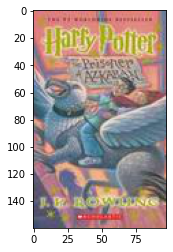

Harry Potter and the Philosopher's Stone


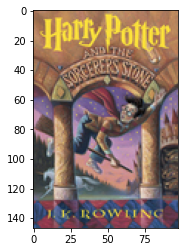

Harry Potter and the Order of the Phoenix


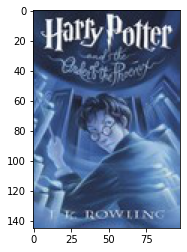

Harry Potter and the Chamber of Secrets


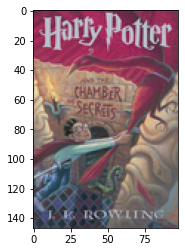

Harry Potter and the Deathly Hallows


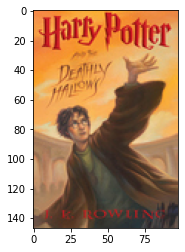

Harry Potter and the Half-Blood Prince


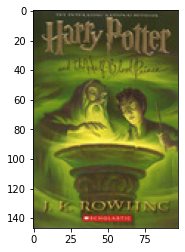

Harry Potter Boxed Set Books 1-4


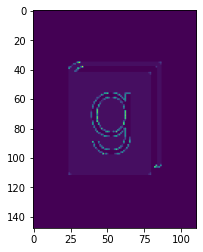

Harry Potter Collection (Harry Potter, #1-6)


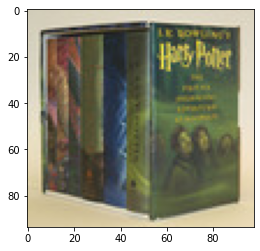

Complete Harry Potter Boxed Set


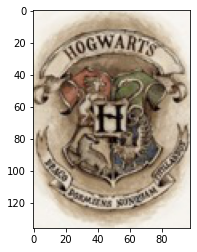

Harry, A History: The True Story of a Boy Wizard, His Fans, and Life Inside the Harry Potter Phenomenon


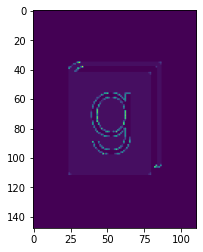

In [36]:
#Sample inputs: The Hobbit , Harry Potter and the Goblet of Fire , The Two Towers
name=input("Enter field: ")
books = get_recommendations(name, cosine_sim_content)
book_shows(books)